In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download()
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package biocreative_ppi to /root/n

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/spam.csv',encoding='ISO-8859-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data=data.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], axis=1)

In [ ]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.shape

(5572, 2)

In [ ]:
data['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [ ]:
data=data['v2'].str.lower()

In [ ]:
data.isnull().sum()

0

#### Performing EDA

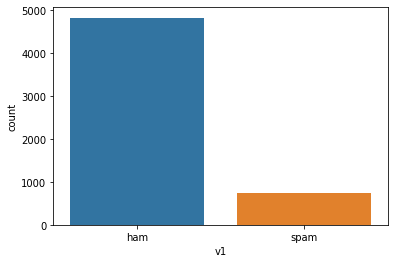

In [ ]:
sns.countplot(x ='v1', data = data)
plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

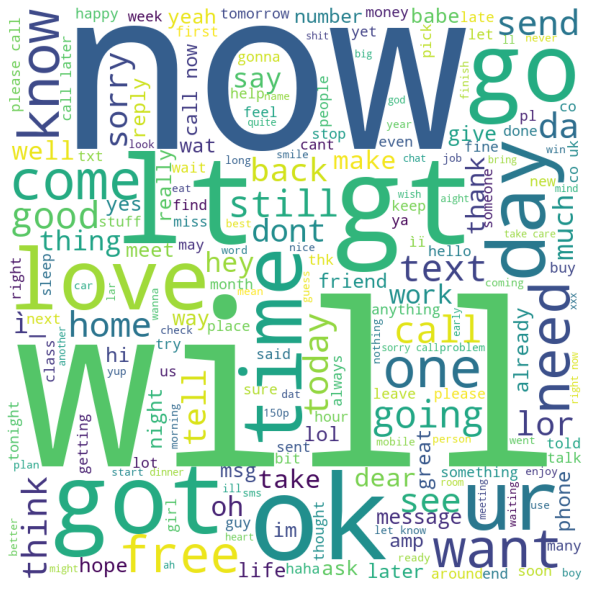

In [ ]:
comment_words = ""
for val in data.v2:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#### Performing Stemming and Removing Stopwords


In [ ]:
stemmer = LancasterStemmer()
final_corpus=[]
stop_words = set(stopwords.words('english'))
for i in range(len(data)):
  word_tokens = word_tokenize(example_sent)
  filtered_sentence = [stemmer.stem(w) for w in word_tokens if not w.lower() in stop_words]
  j = " ".join(word)
  final_corpus.append(j)
final_corpus[1]
 
 

AttributeError: ignored

In [ ]:
final_corpus = []
stemmer = LancasterStemmer()

stuff_to_be_removed = set(stopwords.words('English'))
for i in range(len(data)):
  word = word_tokenize(data['v2'][i].lower())
  word = [stemmer.stem(y) for y in word if y not in stuff_to_be_removed]
  j = " ".join(word)
  final_corpus.append(j)
final_corpus[1]

AttributeError: ignored

#### Converting Text Data into Vectorized form


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(final_corpus)
print(type(vector))
X = vector.toarray()
y=data['v1']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Model Selection

In [ ]:
models=[]
models.append(('Logistic Regression',LogisticRegression()))
models.append(('Decision tree',DecisionTreeClassifier()))
models.append(('SVC',SVC(gamma='auto')))
models.append(('KNN',KNeighborsClassifier()))
models.append(('Naive bayes',GaussianNB()))
models.append(('Random Forest',RandomForestClassifier()))
models.append(('Adaboost',AdaBoostClassifier()))
models.append(('XGB',XGBClassifier()))

In [ ]:
for name,model in models:
  print(name)
  model.fit(X_train,y_train)
  predict=model.predict(X_test)
  print(classification_report(predict,y_test))
  print('---------------------------------------------------------')

From above all classification report, we can conclude Random Forest Classifier is perfroming best with 98% accuracy and recall 98% recall and 100% precision.